# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [3]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Dataset


In [7]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")


## EDA
Uncomment to see desired output. Add more analysis if you like

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  education  income_annum   loan_amount  \
count  4269.000000       4269.000000        0.0  4.269000e+03  4.269000e+03   
mean   2135.000000          2.498712        NaN  5.059124e+06  1.513345e+07   
std    1232.498479          1.695910        NaN  2.806840e+06  9.043363e+06   
min       1.000000          0.000000        NaN  2.000000e+05  3.000000e+05   
25%    1068.000000          1.000000        NaN  2.700000e+06  7.700000e+06   
50%    2135.000000          3.000000        NaN  5.100000e+06  1.450000e+07   
75%    3202.000000          4.000000        NaN  7.500000e+06  2.150000e+07   
max    4269.000000          5.000000        NaN  9.900000e+06  3.950000e+07   

    

ValueError: could not convert string to float: 'No'

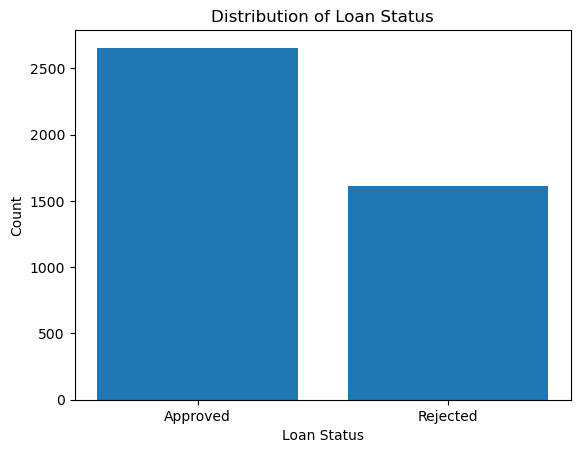

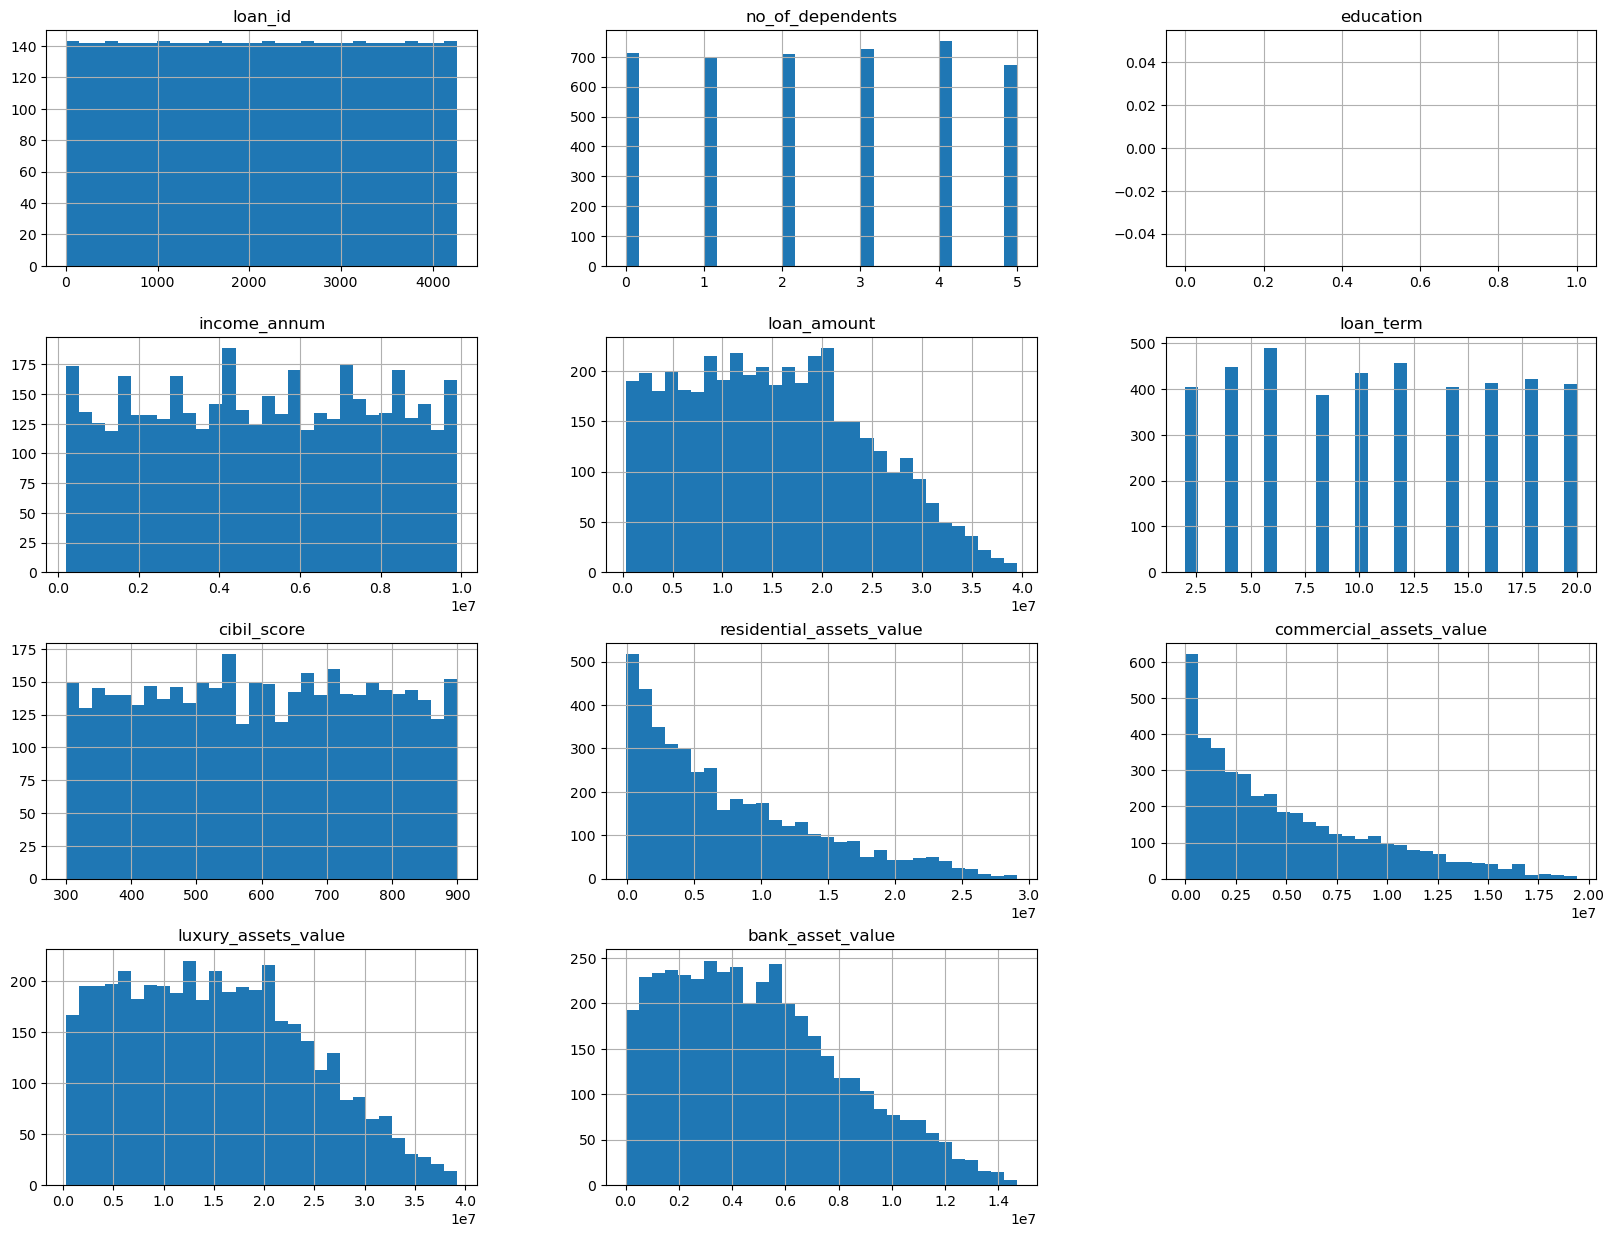

In [26]:
import matplotlib.pyplot as plt
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})

print(loan_data.columns)
print(loan_data.describe())

# ------ Check for missing values ------
print(loan_data.isnull().sum())

# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))

# ------ Correlation matrix ------
corr_matrix = loan_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)



## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [22]:
# Hint: Other categorical variables are self_employed and loan_status
# TODO

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [17]:
# TODO
df = loan_data.copy()

if df['loan_status'].dtype == 'O':
    df['loan_status'] = df['loan_status'].str.lower().map(
        {'approved':1, 'rejected':0, 'yes':1, 'no':0}
    )

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X = X.select_dtypes(include=['number']).dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Training and Evaluation

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Model Optimization and Testing

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8173302107728337
Precision: 0.8119800332778702
Recall: 0.9190207156308852
F1: 0.8621908127208481
ROC-AUC: 0.9010687236536006


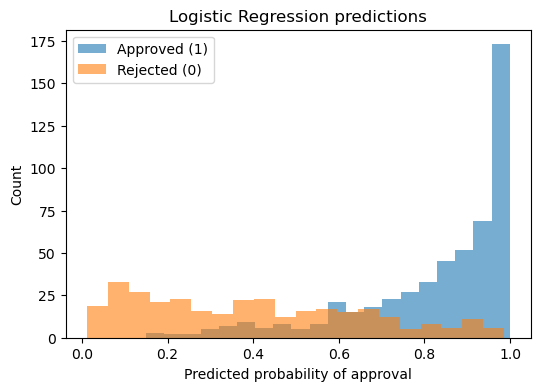

In [15]:
plt.figure(figsize=(6,4))
plt.hist(y_proba[y_test==1], bins=20, alpha=0.6, label="Approved (1)")
plt.hist(y_proba[y_test==0], bins=20, alpha=0.6, label="Rejected (0)")
plt.xlabel("Predicted probability of approval")
plt.ylabel("Count")
plt.legend()
plt.title("Logistic Regression predictions")
plt.show()
